# Overview

By means of IMDb website and a webscraping code, it was possible to fetch data about JoJo episodes from 1th to 4th season as it follows

In [5]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("jojo-dataset-csv.csv")

display(df)

,title,season,ep_number,rate,duration
0,Dio the Invader,1,1,7.4,24.0
1,Kako kara no tegami,1,2,7.5,24.0
2,Dio to no seishun,1,3,8.0,26.0
3,Hamon shissô ôbâdoraibu,1,4,7.1,24.0
4,Ankoku no kishi-tachi,1,5,7.1,25.0
...,...,...,...,...,...
146,"The Requiem Quietly Plays, Part 1",4,34,9.2,25.0
147,"The Requiem Quietly Plays, Part 2",4,35,9.4,25.0
148,Diavolo Surfaces,4,36,9.3,25.0
149,King of Kings,4,37,9.6,25.0


## Insights

One can see JoJo episodes with rate greater than 9.0 are more concentrated on fourth season, which one might presume this season has the most famous episodes.

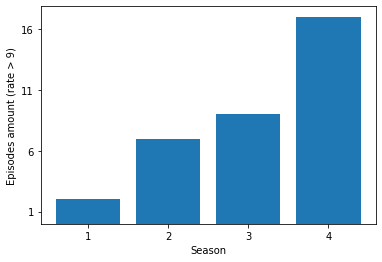

In [6]:
# Group (rate > 9) by season
counts =  df[df.rate > 9]["season"].value_counts()

# Mounting dataframe
df_rategt9 = pd.DataFrame(counts)
df_rategt9 = df_rategt9.reset_index()
df_rategt9.columns = ["season","episodes_amount"]

plt.bar(df_rategt9["season"], df_rategt9["episodes_amount"])

plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(1,20, 5))

plt.ylabel("Episodes amount (rate > 9)")
plt.xlabel("Season")

plt.show()


Below, a bar chart that shows how much time each episode takes in average. One can realize the most long episodes are on fourth season.

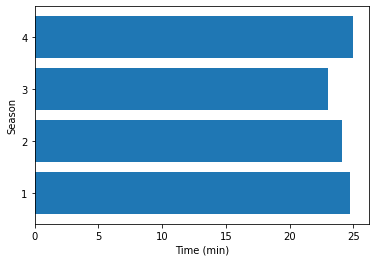

In [7]:
df_mean = df.groupby(["season"]).mean()
df_mean = df_mean.reset_index()

seasons = df_mean["season"]
durations = df_mean["duration"]

fig, ax = plt.subplots()

ax.barh(seasons, durations, align="center")

ax.set_xlabel("Time (min)")
ax.set_ylabel("Season")

plt.yticks(np.arange(1,5,1))
plt.xticks(np.arange(0,27, 5))

plt.show()


Finally, one can see the less episodes amount are on first season, whereas the biggest one are on second season.

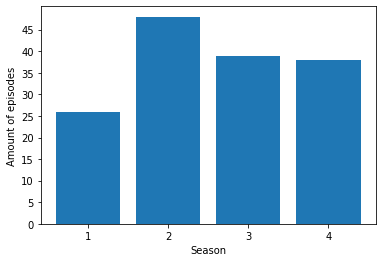

In [8]:
df_count = df.groupby(["season"]).count()
df_count = df_count.reset_index()

amount_episodes = df_count["ep_number"]
seasons = df_count["season"]

plt.bar(seasons, amount_episodes)
plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(0,50, 5))

plt.ylabel("Amount of episodes")
plt.xlabel("Season")

plt.show()